# Ensemble Methods: Combining Models for Great Good!
We're going to chat about Ensemble Methods today, but first I want to take a few minutes to explicitly discuss an important concept regarding the errors of Machine Learning models (**learners**, we'll use this terminology today).

So let's talk about **Bias-Variance Decompositions**!

## Taking a Step Back: Bias/Variance Decompositions

##### Notation
- $f(x) = f$: The ground truth mapping between features and targets, up to random noise.
  - What we're seeking to approximate/find in any ML problem!
  - **Remember**: ML is about function approximation!
- $\hat{f}(x) = \hat{f}$: A learner that tries to approximate $f$
- $y = f(x) + \epsilon$: The target $y$ is assumed to be dependent on the features $x$ according to the function $f(x)$ plus some random noise, $\epsilon$.
  - $\epsilon$ is assumed to have zero mean and variance $\sigma ^2$

##### Definitions
- **Bias**: error from erroneous assumptions in the learning algorithm
  - The expected average deviation of $\hat{f}$ from the true function $f$
  - **High Bias** often results in **underfitting**.
  - $\text{Bias}(\hat{f}) = E[\hat{f} - f]$
- **Variance**: error from small random fluctuations in the training set
  - You take 10 different random samples, don't get the same model each time $\rightarrow$ variance
  - **High Variance** often results in **overfitting**.
  - $\text{Var}(\hat{f}) = E[\hat{f}^2] - E[\hat{f}]^2$
- **Noise** or **Irreducible Error** $\epsilon$: error due to random fluctuations in the data itself or noise not related to our features
  - We cannot model away this error $\epsilon$, it's truly random.

### The Decomposition
- The error of any Machine Learning learner, $\hat{f}(x)$ can be decomposed into:
$$
\bbox[aqua, 8px]{
\text{error}_{\hat{f}(x)} = \text{Bias}(\hat{f}(x))^2 + \text{Variance}(\hat{f}(x)) + \epsilon
}
$$
- **What does this mean for us?**
  - We seek models with **both** low bias and low variance.
  - But...**Bias and Variance usually have an inverse relationship!**
    - As one goes down, the other goes up.
    - This is called the **Bias-Variance Tradeoff**
    
#### Proof of the Decomposition
**Remember this identity**? 
$\text{Var}(X) = E[X^2] - E[X]^2$

Today we'll use it, in this form:  
$E[X^2] = \text{Var}(X) + E[X]^2$

##### More Identities:
- $E[f] = f$ ($f$ is a deterministic function)
- $E[y] = E[f + \epsilon] = E[f] + E[\epsilon] = f + 0 = f$
- $\text{Var}(y) = E[(y-E[y])^2] = E[(y-f)^2] = E[(f + \epsilon - f)^2] = E[\epsilon ^2] = \text{Var}(\epsilon) + E[\epsilon]^2 = \sigma^2 + 0 = \sigma^2$
- **Error of $\hat{f}$**: $E[(y-\hat{f})^2]$
- **Proof of Bias/Variance Decomposition:**
$$
\bbox[aqua, 8px]{
\begin{eqnarray*}
E[(y-\hat{f})^2]
& = & E[y^2 + \hat{f}^2 -2y\hat{f}] \\   
& = & \text{Var}(y) + E[y]^2 + \text{Var}(\hat{f}) + E[\hat{f}]^2 - 2fE[\hat{f}] \\
& = & \text{Var}(y) + \text{Var}(\hat{f}) + f^2 - 2fE[\hat{f}] + E[\hat{f}]^2 \\
& = & \text{Var}(y) + \text{Var}(\hat{f}) + (f-E[\hat{f}])^2 \\
& = & \text{Var}(y) + \text{Var}(\hat{f}) + E[f-\hat{f}]^2 \\
& = & \sigma^2 + \text{Var}(\hat{f}) + \text{Bias}(\hat{f})^2
\end{eqnarray*}
}
$$

### Examples of Bias vs Variance in ML
- Like always, we want to choose a model of appropriate **complexity**.
  - The best model **minimizes generalization error**, error on future data.
  - The **bias-variance tradeoff** says bias and variance will push against each other.  
    - High bias variance models (strong simplifying assumptions) will have low variance (not sensitive to random outliers in the training set).
    - Low bias models (few simplifying assumptions) will have high variance (highly sensitive to random outliers).  
<img src='img/biasvariance.png'/>

#### Bias-Variance vs Under/Overfitting
- The Bias-Variance viewpoint is really just a different spin on the idea of **underfitting** vs **overfitting**.
- Models with **high bias tend to underfit**.
  - You've made too many simplifying assumptions in your model.
- Models with **high variance tend to overfit**.
  - Your model will "learn" the random variations in the training set, rather than the simpler underlying function.
<img src='img/errors.png'/>

##### Bias/Variance in Regression
Here's how this might work for regression:
<img src='img/overfit.png'/>

##### Bias/Variance in Classification
Here's how this might work for classification:
<img src='img/overfit2.png' style='height:400px'/>

##### Question: What are some examples of high bias or high variance models that you've seen?

## Ensemble Methods
- **Ensemble models combine predictions** of multiple learners (**base learners**) to create an improved **aggregate learner**.
- Effectively averages (in a smart way) predictions of base learners.
  - Averaging addresses key issues for finding models of appropriate complexity (bias/variance)
    1. "The Statistical Problem"
    2. "The Computational Problem"
    3. "The Representational Problem"
- Focus on a few common methods for doing this:
  1. **Bagging**
    - e.g.: Random Forests
  2. **Boosting**
    - e.g.: Gradient Boosted Trees
  3. **Stacking** 
  
### Problems in Machine Learning (Function Approximation)
- Any supervised learning problem can be viewed as a task in **function approximation**.
  - For a **feature space**, $X$, seek a learner $\hat{f}(X)$ that approximates the true mapping $f(X)$ between the feature space and a target variable $y$ s.t. $y=f(X)$
  - Amounts to **search of hypothesis space**, $H$, for best possible function.  Search the possible hypotheses (function mappings), and choose the best one!
- Task is made especially challenging by 3 common problems:
  - The Statistical Problem
  - The Computational Problem
  - The Representational Problem
  
#### The Statistical Problem in ML
- With limited data, a **base learner** may have **difficulty converging** to the **true function**, $f$
- Ensemble Methods may mitigate this problem by "averaging out" base learners:
<img src='img/statistical.png' style='height:300px'/>

#### The Computational Problem in ML
- Even with enough data to combat the statistical problem, the **hypothesis space** of possible base learners may simply be **too large** to search it all.
  - e.g.: Decision Trees have way too many possible trees!  Can't feasibly try them all!
- Ensemble Methods mitigate this by searching different regions of the sample space:
<img src='img/computational.png' style='height:300px'/>

#### The Representational Problem in ML
- Some **functions** may be **impossible for a base learner to represent**.
- Ensemble Methods mitigate this by averaging to approximate $f$ or even possibly expanding the space of reachable functions for a base learner:
<img src='img/representational.png' style='height:300px'/>
- For example, consider classification where $f$ is a linear decision boundary.
  - How can a decision tree represent the boundary below?
  <img src='img/decision_tree2.png' style='height:400px'/>

### Bagging
- Bagging (**Bootstrap Aggregating**) creates **parallel base learners** and predicts a **weighted average (vote) of the base learner predictions**. 
  - Votes are often weighted by base learner error.
<img src='img/bagging.png' style='height:300px'/>
- Base learners are trained using **bootstrap sampling** from the training set.
  - **Bootstrapping**: Random sampling of a dataset with replacement.
- Bagging often performs well for **base learners with low bias and high variance**.

##### Question for understanding: Why might bagging help for high variance models?

#### Different Flavors of Bagging
Bagging techniques are generally distinguished based on how they sample the training set for each base learner:
- **Pasting**: $X$ matrix is sampled without replacement, aka each base learner gets a different partition of the training set (meh, usually no thanks)
- **Bagging** Proper: Sampling **instances** with replacement.
  - Each learner gets a **subset of the rows** sampled with replacement.
- **Random Subspaces**: Sampling **features** with replacement.
  - Each learner gets a **subset of the columns** sampled with replacement.
- **Random Patches**: Sampling **both instances and features** with replacement.
  - Each learner gets a **subset of the rows and columns** sampled with replacement.
  - e.g.: Random Forests (basically)

#### Bagging in `sklearn`
- You can perform `Bagging` in `sklearn` for your chosen base learner for Classification and Regression with [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) and [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor) respectively.
- Each "Meta Learner" takes:
  - A base learner
  - Parameters specifying how to sample across base learners (and/or how many to have)

Let's look at an example!

In [1]:
from sklearn.datasets import california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import BaggingRegressor

# Get California Housing Price Data
housing_dataset = california_housing.fetch_california_housing()
X = housing_dataset.data
y = housing_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train and Score Decision Tree Regressor (base learner)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print('Decision Tree Score: ' + str(dt.score(X_test, y_test)))

# Train and Score Bagged Tree Regressor (ensemble learner)
bagged_tree = BaggingRegressor(DecisionTreeRegressor())
bagged_tree.fit(X_train, y_train)
print('Bagged Tree Score: ' + str(bagged_tree.score(X_test, y_test)))
print('Woohoo!')

Decision Tree Score: 0.566705664845
Bagged Tree Score: 0.792111213265
Woohoo!


In [2]:
bagged_tree.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=410718799, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1226630074, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=191679680, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            r

### Boosting
**Question:** Given some **weak learner** (aka just barely better than random guessing), can we perform some procedure to **"boost"** that learner to become a **strong learner** (aka of arbitraryily strong accuracy) on the training set?

**Answer:** Yes!  This is the idea that motivated **Boosting**.  There's even a rigorous theorem to say so, all mathy and stuff.

- **Boosting** creates **base learners in series**  and predicts a **weighted average (vote) of the base learner predictions**.
- Each base learner in the series is trained on data sampled from the training set according to some **sampling distribution** (with replacement, usually).
  - **Sampling Distribution**: Assigns a probability to each datapoint to be sampled.
  - e.g.: Random sampling: all datapoints have equal probability.
- The **sampling distribution** of each learner is **weighted in favor** of the **datapoints with largest error** in previous learner.
- The final vote is often weighted by base learner error.
- Boosting often performs well for **base learners with high bias and low variance**.
  - e.g.: "Shallow" (small max depth) decision trees.
- **Warning**: Boosting is heavily prone to overfitting!

##### Question for understanding: Why might boosting prefer high bias models?

#### AdaBoost
- AdaBoost, or Adaptive Boosting, was the original answer to the question of whether we can "boost" a weak learner into a strong learner.
- It's simple, and defined by its **sampling distribution** at each iteration:
  - **AdaBoost Sampling Distribution**: Each instance is assigned a **sampling probability** proportional to its error rate to that point.

#### Gradient Boosting
- Also known in general as **Gradient Boosted Machines (GBM)**.
- Gradient Boosting goes a step further than AdaBoost:
  - By introducing a **differentiable loss function** that points in the direction of steepest increase in function space.
  - **Idea: If we can find a way to write our loss function in a way to take its gradient, we can simply correct the base learner from the previous boosting iteration by moving in the negative direction of the gradient.**
- Essentially, each successive boosting learner learns to correct the mistakes of its predecessor.

##### An Example: Linear Regression:
- Assume at each stage, $m$, of boosting that an imperfect learner estimate is given by the function $F_m(x)$.
- At stage $m+1$, we want to add a correction $h(x)$ that moves $F_{m+1}$ closer to the true value of $y$
  - That is: $F_{m+1}(x) = F_m(x) + h(x)$
- To do this, we fit: $h(x) = y - F_m(x)$
- In other words, for Linear Regression, we **fit $h(x)$ to the residuals** at each step.
- This is equivalent to using the usual **mean squared error** as our loss function and performing gradient descent.

**While Gradient Boosting is easiest to understand mathematically with regression, it's a general concept.  As long as we can write down our loss function at each iteration we can correct in the next iteration via gradient descent.**  It's the exact same concept for trees, where you most often see Gradient Boosting.

#### Boosting in `sklearn`
- You can perform basic `Boosting` in `sklearn` for your chosen base learner for Classification and Regression with [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [AdaBoostRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) respectively.
- Each "Meta Learner" takes:
  - A base learner
  - Parameters specifying how to sample across base learners (and/or how many to have)

Let's look at an example!

In [3]:
from sklearn.datasets import california_housing
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import AdaBoostRegressor

# Get California Housing Price Data
housing_dataset = california_housing.fetch_california_housing()
X = housing_dataset.data
y = housing_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train and Score Linear Regressor (base learner)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression Score: ' + str(lr.score(X_test, y_test)))

# Train and Score Boosted Linear Regressor (ensemble learner)
boosted_lr = AdaBoostRegressor(LinearRegression())
boosted_lr.fit(X_train, y_train)
print('Boosted Regressor Score: ' + str(boosted_lr.score(X_test, y_test)))
print('Meh...')

Linear Regression Score: 0.587080729993


//anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Boosted Regressor Score: 0.593532971835
Meh...


### Stacking
- Stacking is a 3rd (though perhaps less referenced...though that's only because it's not native in `sklearn` probably (yet!)) technique for alleviating the "problems in ML" above via ensembling.
- Stacking directly feeds the **predictions of base learners** into **inputs of a meta learner(s)**.
- One can imagine stacking arbitrarily large "networks" of learners together to yield one big meta learner for predictions, rather than the weighted votes of before.
  - In theory, any base learner is possible.  In practice, it's often Logistic Regression.
- The idea looks something like this:
<img src='img/stacking.png' style='height:400px'/>

#### Stacking (not) in `sklearn`, aka with `mlxtend`
- Stacking is not in `sklearn` (yet).
- Some kind souls have implemented it over top of `sklearn` though.
  - One example is in the `mlxtend` package.
  - Download it now with: `pip install mlxtend`.

Let's try the following stacking example with `mlxtend`!

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.91 (+/- 0.06) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [StackingClassifier]


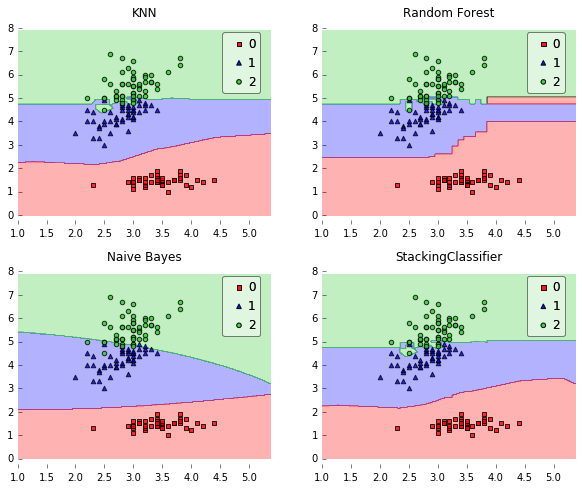

In [4]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
%matplotlib inline

# Load Iris data
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

# Create some base classifiers and a stack of them all
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

# Fit and score base classifiers and stacked classifier
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = cross_validation.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

# Plot our results!
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
plt.show()

### Tree-Based Ensembles
- Tree-based models (e.g. Decision Trees) are well suited for ensemble models because:
  - They are unstable, aka high variance, or can be low variance and high bias with suitable parameters for boosting.
  - They're generally quick.
  - They're good at handling all varieties of data types and thus "just work".
- For this reason, a number of "out of the box" ensemble methods already exist for Decision Trees.
  - For Bagging (ish): Random Forests
  - For Boosting: Gradient Boosted Trees
- These models are very popular because they very rarely perform terribly and often are among the best models with little feature engineering effort!
  - **Warning/Remember**: There **is no silver bullet** (yet, Deep Learning practitioners may beg to differ!) for Machine Learning.  That is, there is generally no 1 ML algorithm that always beats all the others.  If there were, we wouldn't be doing this class.  This is often referred to as the "no free lunch" theorem/hypothesis.

#### Random Forests
- **Base learners** in Random Forests are **decision trees**.
- **Base learners** are executed in parallel for Random forests, a la **Bagging**.
- Prediction comes from a (possibly weighted) majority vote of base learner predictions.
- Base learners are trained on **random samples of instances with replacement**.
  - Aka each base learner gets a random subset of rows from $X$ with replacement.
- **Random Forests differ from basic bagging because**:
  - In building the base decision trees, **at each split step the algorithm only considers a random subset of the features** (Random subspaces).
    - This keeps the base learners from being overly correlated with one another by all choosing the same features.

##### Random Forests in `sklearn`
- Random Forests are implemented in `sklearn` in the [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) and [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) classes for Classification and Regression respectively.
- The number of base learners is controlled with the `n_estimators` parameter
- **Parallelization**: You can run your base learners in parallel for performance, with the `n_jobs` parameter

##### ExtraTrees in `sklearn`
- `sklearn` provides an "Even More Random Forests" approach, with `ExtraTreesClassifier` and `ExtraTreesRegressor` for "Extremely Randomized Trees".
- This adds even more bias via more randomness, but hopefully decreases variance even more.
- At each split, a random threshold for information gain is specified for each feature, and the feature to split on chosen from that rather than the one with the lowest overall value.

Here is an example of Random Forests and ExtraTrees on the Iris dataset!

DecisionTree with features [0, 1] has a score of 0.926666666667
RandomForest with 30 estimators with features [0, 1] has a score of 0.926666666667
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.926666666667
AdaBoost with 30 estimators with features [0, 1] has a score of 0.84
DecisionTree with features [0, 2] has a score of 0.993333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.993333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.993333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.993333333333
DecisionTree with features [2, 3] has a score of 0.993333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.993333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.993333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.993333333333


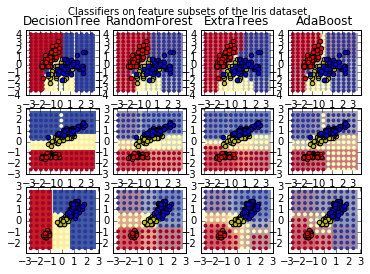

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print( model_details + " with features", pair, "has a score of", scores )

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a black outline
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        for i, c in zip(xrange(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                        cmap=cmap)

        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

#### Gradient Boosted Trees
- For a time, Random Forests ruled the world.  
- Now that we are older and wiser, "Boosted Trees" may have taken their place.  
- For this reason, **Gradient Boosted Trees** also have their own special existence in `sklearn` now.

##### The Maths of Boosted Trees
- The concept for trees is the same as the general idea for **GBM**:
  - For $M$ stages of boosting, seek functions of the form: $F_M = \sum\limits_{i=1}^{M}\gamma_ih_i(x)$.
  - At each stage, we **learn** a new function $h_i$ that seeks to correct errors from $F_{i-1}$ via gradient descent.
  - We sum (weighted) the predictions of each $h_i$ for the final prediction.
- The gradient derivation for tree models is too much to go through here, but you can take a look for the popular implementation **XgBoost** (Extreme Gradient Boosting) [here](http://xgboost.readthedocs.io/en/latest/model.html).
- Gradient Boosting yields an **objective function to maximize for each new tree**.
  - For building each tree, we **maximize that objective function at each split of the tree**.
- Here's a schematic!

<img src='img/xgboost.jpg'/>


##### Boosted Trees in `sklearn`
- Boosted Trees are implemented in `sklearn` in the [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) and [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) classes for Classification and Regression respectively.
- The number of base learners is controlled with the `n_estimators` parameter

#### Feature Importance in Tree Ensembles
- Decision Trees and other base learners usually have a nice interpretation for relative importance of different features.
- With the averaging of ensembles, however, this is somewhat obscured/lost.
- To fix this:
  - Feature importance is often reported as some function of the **proportion of times a feature is split on across all of the component trees**.

### Review: Visualizing the Bias-Variance Tradeoff for Ensemble Methods
- Ensemble Methods essentially work by decreasing the variance (bias) of a base learner by more than the bias (variance) subsequently increases!
- **Important**: In general in ML, understanding how and why errors occur improves model building.  Ensemble methods seek to combine models with **orthogonal** errors such as to reduce the aggregate error.
- Random Forests: High variance model (full decision trees) has the variance "smoothed out" across all trees.
- Boosted Trees: Low Bias model (shallow decision trees) but each component decision tree tackles reduced portion of the hypothesis space so that the simple assumptions (high bias) don't cause as many problems in that region.
  - If you used a High Variance base learner, you'd likely overfit!
- Let's use `sklearn` to visualize the bias/variance of Bagged Decision Trees applied to Regression:

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


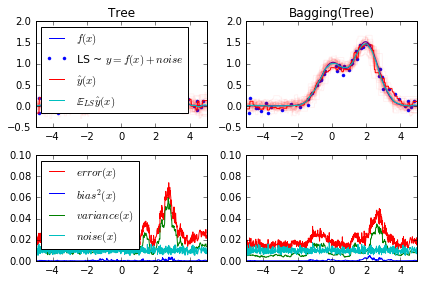

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)

# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label="$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == 0:
        plt.legend(loc="upper left", prop={"size": 11})

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == 0:
        plt.legend(loc="upper left", prop={"size": 11})

plt.tight_layout()
plt.show()

#### Final Thoughts
- Ensemble Methods improve on base learners by reducing bias (variance) more than they increase variance (bias).
- Bagging methods work in parallel, and thus are often more scalable.
- Boosting methods work very well, but can struggle with over-fitting and multiclass problems, as well as scaling.
- If you realize want to squeeze the most value out of the data you have, Ensemble Methods are probably the answer.
- **BUT** that doesn't get you off the hook with feature engineering!  Feature engineering is still where you'll make your money as a data scientist!
- Ensemble methods really aren't so scary!  In fact, they're a pretty simple idea.  Hopefully Random Forests and Boosting algorithms aren't such a magic black box to you now!